# Data Analysis with Pandas Part 1

These notebooks are designed for my June 14-18 course "Data Analysis with Pandas," part of the [2021 Text Analysis Pedagogy Institute](https://nkelber.github.io/tapi2021/book/intro.html). These notebooks are still in active development!!

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [38]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [39]:
pd.options.display.max_rows = 200

## Get Data

To read in a CSV file, we will use the method `pd.read_csv()` and insert the name of our desired file path. 

In [40]:
pd.read_csv('Seattle-Library_2020-2021.csv')

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,CheckoutMonthYear
0,Digital,OverDrive,EBOOK,2020,4,23,Eileen: A Novel,Ottessa Moshfegh,"Fiction, Literature, Thriller","Penguin Group (USA), Inc.",2015,2020-04
1,Digital,OverDrive,EBOOK,2020,5,40,The Grammarians: A Novel,Cathleen Schine,"Fiction, Literature",Macmillan Publishers,2019,2020-05
2,Digital,OverDrive,EBOOK,2020,5,50,The Scent Keeper: A Novel,Erica Bauermeister,"Fiction, Literature",Macmillan Publishers,2019,2020-05
3,Physical,Horizon,BOOK,2020,1,355,Exhalation / Ted Chiang.,"Chiang, Ted","Science fiction, Short stories","Alfred A. Knopf,",2019.,2020-01
4,Digital,OverDrive,EBOOK,2020,1,34,Vacationland: True Stories from Painful Beaches,John Hodgman,"Biography & Autobiography, Nonfiction, Perform...","Penguin Group (USA), Inc.",2017,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...
34228,Digital,OverDrive,EBOOK,2021,2,111,Why We Sleep: Unlocking the Power of Sleep and...,Matthew Walker,"Health & Fitness, Nonfiction, Psychology, Science","Simon & Schuster, Inc.",2017,2021-02
34229,Digital,OverDrive,EBOOK,2021,2,45,The Topeka School: A Novel,Ben Lerner,"Fiction, Literature",Macmillan Publishers,2019,2021-02
34230,Digital,OverDrive,EBOOK,2021,2,26,"Eddie's Boy: The Butcher's Boy Novels, Book 4",Thomas Perry,"Fiction, Mystery, Suspense, Thriller",Open Road Integrated Media,2020,2021-02
34231,Digital,OverDrive,EBOOK,2021,2,21,How to Win Friends and Influence People,Dale Carnegie,"Business, Nonfiction, Psychology, Self Help","Simon & Schuster, Inc.",2014,2021-02


In [41]:
type(pd.read_csv('Seattle-Library_2020-2021.csv'))

pandas.core.frame.DataFrame

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), one of the two main data structures in Pandas. A DataFrame looks and acts a lot like a spreadsheet, but it has special powers and functions that we will discuss below and in the next few lessons.

| Pandas objects | Explanation                         |
|----------|-------------------------------------|
| `DataFrame`    | Like a spreadsheet, 2-dimensional    |
| `Series`      | Like a column, 1-dimensional                     |

We assign the DataFrame to a variable called `seattle_df`. It is common convention to name DataFrame variables `df`, but we want to be a bit more specific. 

In [42]:
seattle_df = pd.read_csv('Seattle-Library_2020-2021.csv')

## Begin to Examine Patterns

### Select Columns as Series Objects `[]`

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [43]:
seattle_df['Title']

0                                          Eileen: A Novel
1                                 The Grammarians: A Novel
2                                The Scent Keeper: A Novel
3                                 Exhalation / Ted Chiang.
4          Vacationland: True Stories from Painful Beaches
                               ...                        
34228    Why We Sleep: Unlocking the Power of Sleep and...
34229                           The Topeka School: A Novel
34230        Eddie's Boy: The Butcher's Boy Novels, Book 4
34231              How to Win Friends and Influence People
34232                                             Lab Girl
Name: Title, Length: 34233, dtype: object

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [44]:
type(seattle_df['Title'])

pandas.core.series.Series

## Pandas Methods

| Pandas method | Explanation                         |
|----------|-------------------------------------|
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |
| `.count()`    | Total number of non-blank values    |
| `.value_counts()` | Frequency of unique values |

### ❓  How many check outs per month on average?

In [45]:
seattle_df['Checkouts'].mean()

51.66698799404084

### ❓  What is the maximum number of checkouts per month?

In [46]:
seattle_df['Checkouts'].max()

4903

### ❓  What is the minimum number of checkouts per month?

In [47]:
seattle_df['Checkouts'].min()

21

### ❓ What are the most common material types?

To count the values in a column, we can use the `.value_counts()` method.

What patterns do you notice in this list?

In [48]:
seattle_df['MaterialType'].value_counts()

EBOOK            16174
AUDIOBOOK        11174
BOOK              4340
VIDEODISC         2384
SOUNDDISC           97
REGPRINT            35
MIXED               21
CR                   4
ER                   2
LARGEPRINT           1
ER, VIDEODISC        1
Name: MaterialType, dtype: int64

## Examine Subsets

### ❓  What books are being checked out more than 100 times a month?

To explore this question, we can filter rows with a condition.

In [49]:
seattle_df['Checkouts'] > 100

0        False
1        False
2        False
3         True
4        False
         ...  
34228     True
34229    False
34230    False
34231    False
34232    False
Name: Checkouts, Length: 34233, dtype: bool

`.loc()`

In [59]:
seattle_df.loc[seattle_df['Checkouts'] > 500]

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,CheckoutMonthYear
97,Digital,OverDrive,EBOOK,2020,1,546,Where the Crawdads Sing,Delia Owens,"Fiction, Literature","Penguin Group (USA), Inc.",2018,2020-01
269,Physical,Horizon,MIXED,2020,1,995,Headphones / Seattle Public Library.,NaN,NaN,Seattle Public Library,NaN,2020-01
302,Digital,OverDrive,AUDIOBOOK,2020,1,533,Talking to Strangers: What We Should Know abou...,Malcolm Gladwell,"Nonfiction, Psychology, Sociology","Blackstone Audio, Inc.",2019,2020-01
538,Physical,Horizon,BOOK,2020,1,594,Where the crawdads sing / Delia Owens.,"Owens, Delia","Solitude Fiction, Young women Fiction, Murder ...","G.P. Putnam's Sons,",2018.,2020-01
653,Digital,OverDrive,EBOOK,2020,1,515,Educated: A Memoir,Tara Westover,"Biography & Autobiography, Nonfiction, Religio...","Random House, Inc.",2018,2020-01
1202,Physical,Horizon,BOOK,2020,1,645,The Dutch house : a novel / Ann Patchett.,"Patchett, Ann","Brothers and sisters Fiction, Dysfunctional fa...","Harper, an imprint of HarperCollins Publishers,",[2019],2020-01
1930,Physical,Horizon,BOOK,2020,1,533,The testaments / Margaret Atwood.,"Atwood, Margaret, 1939-","Surrogate mothers Fiction, Man woman relations...","Nan A. Talese/Doubleday,",[2019],2020-01
2193,Physical,Horizon,BOOK,2020,1,598,Such a fun age : a novel / Kiley Reid.,"Reid, Kiley","Babysitters Fiction, Malicious accusation Fict...","G.P. Putnam's Sons,",[2019],2020-01
2242,Physical,Horizon,BOOK,2020,1,523,"Olive, again / Elizabeth Strout.","Strout, Elizabeth","Retired teachers Fiction, City and town life F...","Random House,",[2019],2020-01
2245,Digital,OverDrive,AUDIOBOOK,2020,1,514,So You Want to Talk about Race (Unabridged),Ijeoma Oluo,"Nonfiction, Politics, Sociology","Blackstone Audio, Inc.",2018,2020-01


`.copy()`

In [61]:
frequent_checkouts_df = seattle_df.loc[seattle_df['Checkouts'] > 500].copy()

In [62]:
frequent_checkouts_df['MaterialType'].value_counts()

AUDIOBOOK    35
EBOOK        33
BOOK          7
MIXED         6
Name: MaterialType, dtype: int64

In [65]:
books_filter = frequent_checkouts_df['MaterialType'] == 'BOOK'
frequent_books_df = frequent_checkouts_df[books_filter].copy()
frequent_books_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,CheckoutMonthYear
538,Physical,Horizon,BOOK,2020,1,594,Where the crawdads sing / Delia Owens.,"Owens, Delia","Solitude Fiction, Young women Fiction, Murder ...","G.P. Putnam's Sons,",2018.,2020-01
1202,Physical,Horizon,BOOK,2020,1,645,The Dutch house : a novel / Ann Patchett.,"Patchett, Ann","Brothers and sisters Fiction, Dysfunctional fa...","Harper, an imprint of HarperCollins Publishers,",[2019],2020-01
1930,Physical,Horizon,BOOK,2020,1,533,The testaments / Margaret Atwood.,"Atwood, Margaret, 1939-","Surrogate mothers Fiction, Man woman relations...","Nan A. Talese/Doubleday,",[2019],2020-01
2193,Physical,Horizon,BOOK,2020,1,598,Such a fun age : a novel / Kiley Reid.,"Reid, Kiley","Babysitters Fiction, Malicious accusation Fict...","G.P. Putnam's Sons,",[2019],2020-01
2242,Physical,Horizon,BOOK,2020,1,523,"Olive, again / Elizabeth Strout.","Strout, Elizabeth","Retired teachers Fiction, City and town life F...","Random House,",[2019],2020-01
4972,Physical,Horizon,BOOK,2020,2,539,American dirt / Jeanine Cummins.,"Cummins, Jeanine","Drug traffic Mexico Fiction, Organized crime M...","Flatiron Books,",2020.,2020-02
6554,Physical,Horizon,BOOK,2020,2,529,The Dutch house : a novel / Ann Patchett.,"Patchett, Ann","Brothers and sisters Fiction, Dysfunctional fa...","Harper, an imprint of HarperCollins Publishers,",[2019],2020-02


In [58]:
seattle_df.loc[seattle_df['Checkouts'] == seattle_df['Checkouts'].max()]

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,CheckoutMonthYear
14677,Digital,OverDrive,AUDIOBOOK,2020,6,4903,So You Want to Talk about Race (Unabridged),Ijeoma Oluo,"African American Nonfiction, Nonfiction, Polit...","Blackstone Audio, Inc.",2018,2020-06


## ❓  What data is missing? What data do you wish we had?

## Overview

Generate descriptive statistics for all the columns in the data 

In [18]:
seattle_df.describe()

,CheckoutYear,CheckoutMonth,Checkouts
count,34233.000000,34233.000000,34233.000000
mean,2020.148629,5.350831,51.666988
std,0.355727,3.819019,67.480043
min,2020.000000,1.000000,21.000000
25%,2020.000000,2.000000,25.000000
50%,2020.000000,5.000000,33.000000
75%,2020.000000,9.000000,53.000000
max,2021.000000,12.000000,4903.000000


In [19]:
seattle_df.describe(include='all')

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,CheckoutMonthYear
count,34233,34233,34233,34233.000000,34233.000000,34233.000000,34233,31701,34156,34184,34162,34233
unique,2,2,11,NaN,NaN,NaN,7685,3225,3687,848,148,14
top,Digital,OverDrive,EBOOK,NaN,NaN,NaN,"Little Women: Little Women Series, Book 1",David Baldacci,"Fiction, Literature","Random House, Inc.",2020,2020-01
freq,27348,27348,16174,NaN,NaN,NaN,22,224,2874,4605,6100,4180
mean,NaN,NaN,NaN,2020.148629,5.350831,51.666988,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.355727,3.819019,67.480043,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2020.000000,1.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2020.000000,2.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,5.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2020.000000,9.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN


Generate information about all the columns in the data 

In [20]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34233 entries, 0 to 34232
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UsageClass         34233 non-null  object
 1   CheckoutType       34233 non-null  object
 2   MaterialType       34233 non-null  object
 3   CheckoutYear       34233 non-null  int64 
 4   CheckoutMonth      34233 non-null  int64 
 5   Checkouts          34233 non-null  int64 
 6   Title              34233 non-null  object
 7   Creator            31701 non-null  object
 8   Subjects           34156 non-null  object
 9   Publisher          34184 non-null  object
 10  PublicationYear    34162 non-null  object
 11  CheckoutMonthYear  34233 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


Make a histogram of the DataFrame

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8926fa4e90>,
      dtype=object)

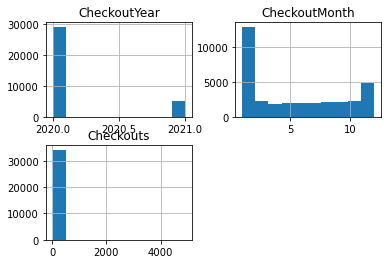

In [21]:
seattle_df.hist()